In [14]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sn
df = pd.read_csv('car.csv',index_col=0).iloc[:,:]
df

,Buying,Maintainence,Doors,Persons,Luggage_boot,Safety,Class
S.No,,,,,,,
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc
5,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1724,low,low,5more,more,med,med,good
1725,low,low,5more,more,med,high,vgood
1726,low,low,5more,more,big,low,unacc


In [15]:
d=len(df['Doors'])
for i in range(0,d):
    if(df.iloc[i,2]=='5more'):
        df.iloc[i,2]=0
d=len(df['Persons'])        
for i in range(0,d):
    if(df.iloc[i,3]=='more'):
        df.iloc[i,3]=0
df

,Buying,Maintainence,Doors,Persons,Luggage_boot,Safety,Class
S.No,,,,,,,
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc
5,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1724,low,low,0,0,med,med,good
1725,low,low,0,0,med,high,vgood
1726,low,low,0,0,big,low,unacc


      Buying  Maintainence Doors Persons  Luggage_boot  Safety  Class
S.No                                                                 
1          3             3     2       2             2       1      2
2          3             3     2       2             2       2      2
3          3             3     2       2             2       0      2
4          3             3     2       2             1       1      2
5          3             3     2       2             1       2      2
...      ...           ...   ...     ...           ...     ...    ...
1724       1             1     0       0             1       2      1
1725       1             1     0       0             1       0      3
1726       1             1     0       0             0       1      2
1727       1             1     0       0             0       2      1
1728       1             1     0       0             0       0      3

[1728 rows x 7 columns]


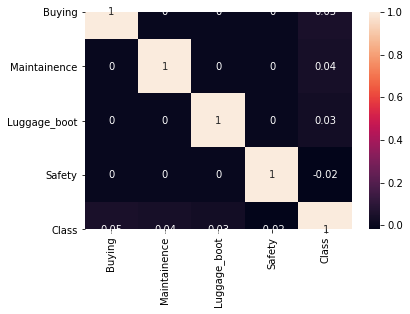

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Buying']=le.fit_transform(df['Buying'])
df['Maintainence']=le.fit_transform(df['Maintainence'])
df['Luggage_boot']=le.fit_transform(df['Luggage_boot'])
df['Safety']=le.fit_transform(df['Safety'])
df['Class']=le.fit_transform(df['Class'])
print (df)
#df=df.astype('int')
correlation_matrix=df.corr().round(2)
sn.heatmap(correlation_matrix, annot=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder(sparse=False)  
re=df['Buying'].values.reshape(len(df['Buying']),1)
ohbuy= onehotencoder.fit_transform(re)
re=df['Maintainence'].values.reshape(len(df['Maintainence']),1)
ohmaint= onehotencoder.fit_transform(re)
re=df['Luggage_boot'].values.reshape(len(df['Luggage_boot']),1)
ohlb= onehotencoder.fit_transform(re)
re=df['Safety'].values.reshape(len(df['Safety']),1)
ohsaf= onehotencoder.fit_transform(re)


print(np.shape(ohbuy))
print(np.shape(ohmaint))
print(np.shape(ohlb))
print(np.shape(ohsaf))

print(df)

(1728, 4)
(1728, 4)
(1728, 3)
(1728, 3)
      Buying  Maintainence Doors Persons  Luggage_boot  Safety  Class
S.No                                                                 
1          3             3     2       2             2       1      2
2          3             3     2       2             2       2      2
3          3             3     2       2             2       0      2
4          3             3     2       2             1       1      2
5          3             3     2       2             1       2      2
...      ...           ...   ...     ...           ...     ...    ...
1724       1             1     0       0             1       2      1
1725       1             1     0       0             1       0      3
1726       1             1     0       0             0       1      2
1727       1             1     0       0             0       2      1
1728       1             1     0       0             0       0      3

[1728 rows x 7 columns]


C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case 

In [18]:
df=df.iloc[:,0:7]
k=0
a=7
labels=['B1','B2','B3','B4','M1','M2','M3','M4','L1','L2','L3','S1','S2','S3']
for i in range(0,4):
    df.insert(a,labels[i],ohbuy[:,i])
    a=a+1
    k=k+1

    
for i in range(k,8):
    df.insert(a,labels[i],ohmaint[:,(i-k)])
    a=a+1
    k=k+1
for i in range(k,11):
    df.insert(a,labels[i],ohlb[:,(i-k)])
    a=a+1
    k=k+1
for i in range(k,14):
    df.insert(a,labels[i],ohsaf[:,(i-k)])
    a=a+1
    k=k+1

df

,Buying,Maintainence,Doors,Persons,Luggage_boot,Safety,Class,B1,B2,B3,...,M1,M2,M3,M4,L1,L2,L3,S1,S2,S3
S.No,,,,,,,,,,,,,,,,,,,,,
1,3,3,2,2,2,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,2,2,2,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2,2,2,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,3,3,2,2,1,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,3,2,2,1,2,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,1,1,0,0,1,2,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1725,1,1,0,0,1,0,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1726,1,1,0,0,0,1,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [19]:
dframe=df.drop(['Buying','Maintainence','Luggage_boot','Safety','S1','S2','S3'],axis=1)
cols=list(dframe)
cols=cols[1:2]+cols[3:]+[cols[2]]
dframe=dframe[cols]
dframe

,Persons,B1,B2,B3,B4,M1,M2,M3,M4,L1,L2,L3,Class
S.No,,,,,,,,,,,,,
1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1725,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1726,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2


In [25]:
from sklearn.model_selection import train_test_split 
from sklearn import model_selection,naive_bayes
from sklearn.naive_bayes import GaussianNB

Y=df['Class']
X=df.drop(['Class'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3)


Naive=naive_bayes.GaussianNB()
Naive.fit(train_x,train_y)
pred_y=Naive.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print(metrics.confusion_matrix(test_y,pred_y))


Accuracy: 0.5298651252408478
[[ 26  24  37  29]
 [  0  14   0   1]
 [ 17 112 211  24]
 [  0   0   0  24]]


In [26]:
from sklearn.model_selection import cross_val_score
res2=(cross_val_score(Naive,train_x,train_y,cv=10)) # prints scores of classifier for each run of the cross validation
print("** 10-fold cross validation using NB**")
for i in range(len(res2)):
    print('Accuracy in run ',(i+1)," :: " ,res2[i])
print("\n\nMean Accuracy==>\t",np.mean(res2))

** 10-fold cross validation using NB**
Accuracy in run  1  ::  0.4796747967479675
Accuracy in run  2  ::  0.5
Accuracy in run  3  ::  0.5163934426229508
Accuracy in run  4  ::  0.5081967213114754
Accuracy in run  5  ::  0.45454545454545453
Accuracy in run  6  ::  0.5371900826446281
Accuracy in run  7  ::  0.475
Accuracy in run  8  ::  0.5833333333333334
Accuracy in run  9  ::  0.5378151260504201
Accuracy in run  10  ::  0.5462184873949579


Mean Accuracy==>	 0.5138367444651187
